## ALGORITMOS DE APRENDIZAJE NO SUPERVISADO 
NOMBRE: JERSSON ARLEY GONZALEZ GOMEZ -
GRUPO: 202016908_35

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')

In [64]:
Datos = pd.read_csv('3Mall_Customers.csv')

In [66]:
Datos.head(20)

,CustomerID,Genero,Edad,Renta_Anual,Puntaje_Gasto
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [68]:
Datos.describe()

,CustomerID,Edad,Renta_Anual,Puntaje_Gasto
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Identificacion de Datos Faltantes y Atipicos')

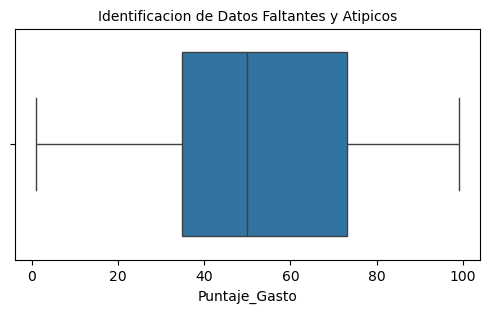

In [72]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Puntaje_Gasto'])
plt.title('Identificacion de Datos Faltantes y Atipicos', fontsize=10 )

In [78]:
print("Cantidad de Registros con cero en Edad: ",Datos['Edad'].isin([0]).sum())
print("Cantidad de Registros con cero en Renta Anual: ",Datos['Renta_Anual'].isin([0]).sum())
print("Cantidad de Registros con cero en Puntaje Gasto: ",Datos['Puntaje_Gasto'].isin([0]).sum())

Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en Renta Anual:  0
Cantidad de Registros con cero en Puntaje Gasto:  0


Text(0.5, 1.0, 'Identificacion de Datos Faltantes y Atipicos')

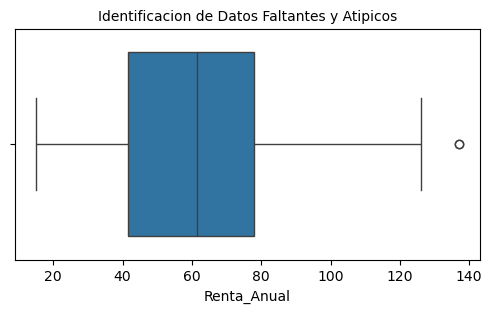

In [80]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Renta_Anual'])
plt.title('Identificacion de Datos Faltantes y Atipicos', fontsize=10 )

In [82]:
Datos = Datos[["Edad","Renta_Anual","Puntaje_Gasto"]]

In [84]:
Datos.head(10)

,Edad,Renta_Anual,Puntaje_Gasto
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


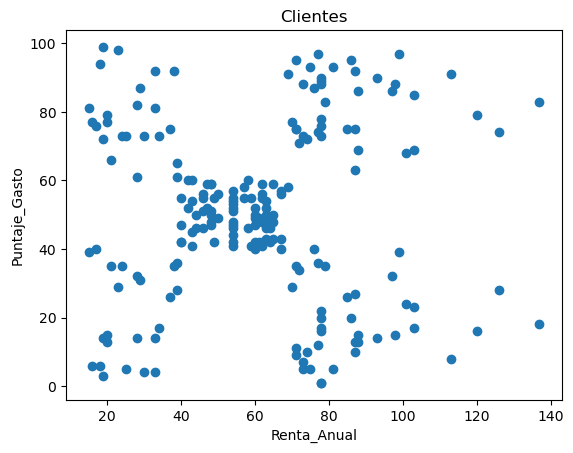

In [86]:
plt.scatter(Datos['Renta_Anual'], Datos['Puntaje_Gasto'])
plt.xlabel('Renta_Anual')
plt.ylabel('Puntaje_Gasto')
plt.title('Clientes')
plt.show()

In [88]:
pip install scikit-learn

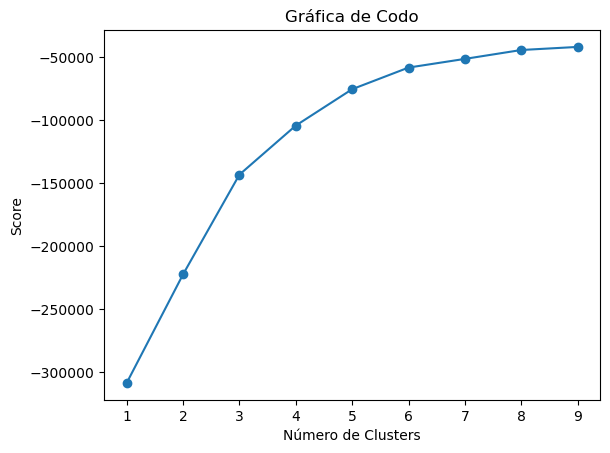

In [89]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(Datos).score(Datos) for i in range(len(kmeans))]
score
plt.plot(Nc, score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Gráfica de Codo')
plt.show()

In [92]:
Modelo = KMeans(n_clusters=5, random_state=0)
Modelo.fit(Datos)

KMeans(n_clusters=5, random_state=0)

In [94]:
Modelo.labels_
Datos['Grupo']= Modelo.labels_
print (Datos)

     Edad  Renta_Anual  Puntaje_Gasto  Grupo
0      19           15             39      2
1      21           15             81      2
2      20           16              6      0
3      23           16             77      2
4      31           17             40      0
..    ...          ...            ...    ...
195    35          120             79      1
196    45          126             28      3
197    32          126             74      1
198    32          137             18      3
199    30          137             83      1

[200 rows x 4 columns]


In [96]:
Observaciones = len(Datos)
X = Datos.drop('Grupo', axis=1)
clusters = Datos ['Grupo']

sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

table_data = [
["Numero de Observaciones", Observaciones],
["Coeficiente Silhouette", sil_score],
["Indice Calinski Marabasz", calinski_score],
["Indice Davies Bouldin", davies_score],
]

from tabulate import tabulate
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+--------------------------+--------------------+
|          Metric          |       Value        |
+--------------------------+--------------------+
| Numero de Observaciones  |        200         |
|  Coeficiente Silhouette  | 0.3771108731967625 |
| Indice Calinski Marabasz | 133.49030043802063 |
|  Indice Davies Bouldin   | 0.9845471043038023 |
+--------------------------+--------------------+


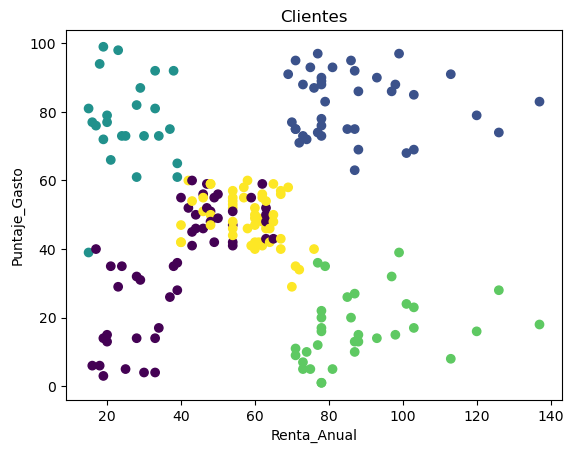

In [98]:
plt.scatter(Datos['Renta_Anual'], Datos['Puntaje_Gasto'], c=Datos['Grupo'], cmap='viridis')
plt.xlabel('Renta_Anual')
plt.ylabel('Puntaje_Gasto')
plt.title('Clientes')
plt.show()

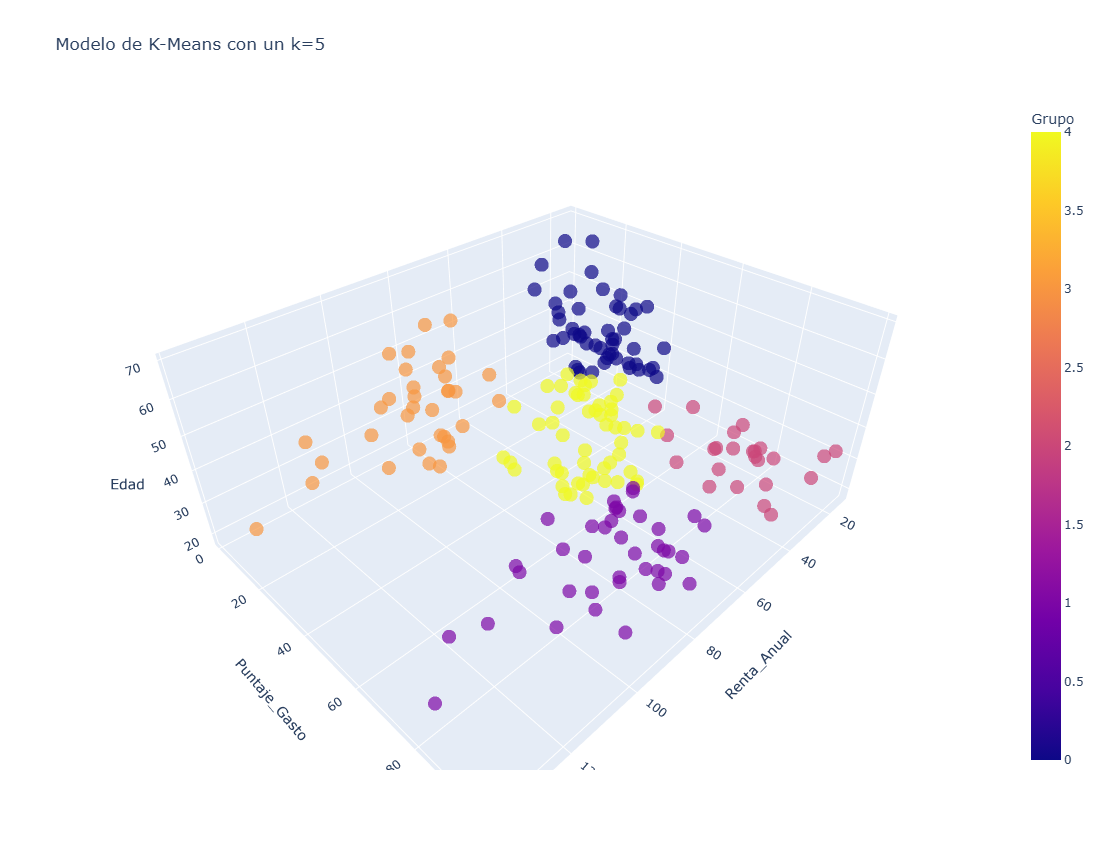

In [102]:
Grafica_3D = px.scatter_3d(
    Datos, 
    x='Renta_Anual', 
    y='Puntaje_Gasto', 
    z='Edad', 
    color='Grupo', 
    symbol_map={0: 'circle', 1: 'circle', 2: 'circle', 4: 'circle', 5: 'circle'},  
    opacity=0.7, 
    width=900, 
    height=850, 
    title='Modelo de K-Means con un k=5',  
    labels={'label': 'Cluster'},  
    color_discrete_map={'0': 'red', '1': 'green', '2': 'blue', '3': 'yellow', '4': 'orange'},  
)

Grafica_3D.update_layout(showlegend=False)  

Grafica_3D.show()